<a href="https://colab.research.google.com/github/abnd-me/Public/blob/main/_ABHINAND_P_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning

In [1]:
#read dataset

import pandas as pd

df = pd.read_csv('/content/Wine_clust.csv')

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.isnull().sum() #check for null values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [3]:
#scale the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

#KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

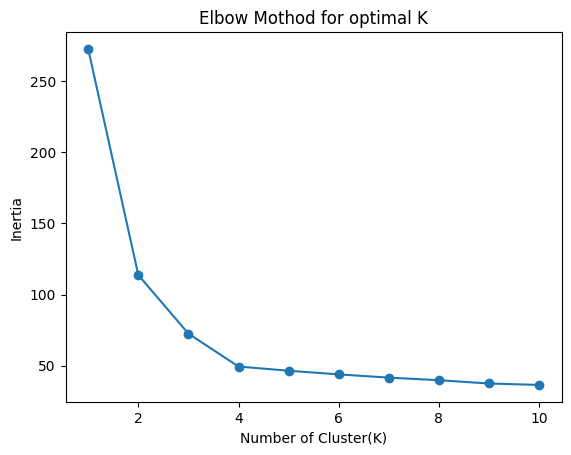

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data_km = df
K_range = range(1,11)
inertia_values = []

#Elbow Method to find optimal number of clusters

for K in K_range:
  kmeans = KMeans(n_clusters=K, random_state=0)
  kmeans.fit(data_km)
  inertia = kmeans.inertia_
  inertia_values.append(inertia)

#drawing elbow graph

plt.plot(K_range , inertia_values, marker='o')
plt.title('Elbow Mothod for optimal K')
plt.xlabel('Number of Cluster(K)')
plt.ylabel('Inertia')
plt.show()


In [9]:
optimal_clusters = 3

#KMeans model with the optimum number of clusters

kmeans_model = KMeans(n_clusters=optimal_clusters)
data_km['Cluster'] = kmeans_model.fit_predict(data_km)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


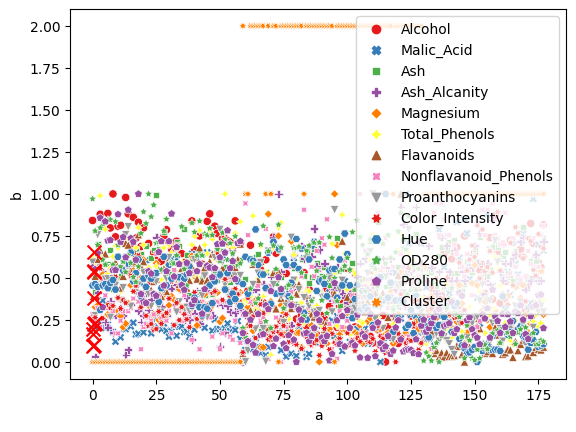

In [7]:

import seaborn as sns

centroids = kmeans.cluster_centers_

sns.scatterplot(data = data_km , palette="Set1")
plt.scatter(centroids[:, 0] , centroids[:,1] , c='red' , marker='x' , s=100)
plt.xlabel("a")
plt.ylabel("b")
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

# Evaluate the algorithm using Silhouette Score
silhouette_avg = silhouette_score(data_km, data_km['Cluster'])
print("Silhouette Score :", silhouette_avg)

Silhouette Score : 0.5363071576162354


#Agglomerative Clustering

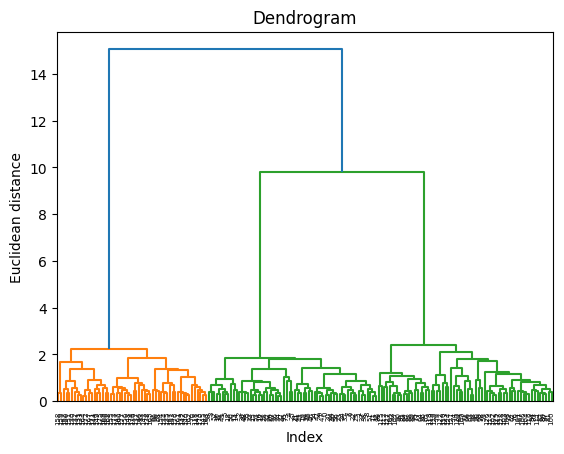

In [10]:
data_agg = df

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

#plot dendogram to find optimal number of clusters
dendorogram = sch.dendrogram(sch.linkage(data_agg,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distance')
plt.show()


In [11]:
#implement Agglomerative Clustering using optimal number of clusters

Agg = AgglomerativeClustering(n_clusters=2 , affinity = 'euclidean' , linkage='ward')
clst = Agg.fit_predict(data_agg)

clst

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
# Evaluate the algorithm using Silhouette Score
silhouette_avg_agg = silhouette_score(data_agg, clst)
print("Silhouette Score :", silhouette_avg_agg)

Silhouette Score : 0.4744285865033424


#DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

data_db = df
#implement DBSCAN algorithm

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
data_db['Cluster'] = dbscan_model.fit_predict(data_db)

In [14]:
data_db['Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Name: Cluster, Length: 178, dtype: int64

In [15]:
# Evaluate the algorithm using Silhouette Score

silhouette_avg_db = silhouette_score(data_db, data_db['Cluster'])
print(f"Silhouette Score for DBSCAN: ",silhouette_avg_db)

Silhouette Score for DBSCAN:  0.5184856579233991
